In [1]:
import pandas
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
erf_folder = "/resnick/groups/enceladus/glavrent/Scalable_GPs/Raw_files/scec/ruptures_erf36"
fn_metadata = '/resnick/groups/enceladus/glavrent/Scalable_GPs/Data/preprocessing/gm_metadata.csv'

df_metadata = pandas.read_csv(fn_metadata)

In [3]:
df_metadata['probability'] = 0.0

In [4]:
df_metadata.columns

Index(['scen_id', 'eq_id', 'source_id', 'rupture_id', 'site_id', 'site_name',
       'mag', 'dip', 'rake', 'z_tor', 'width', 'vs30_thompson', 'vs30_scec',
       'z1.0', 'z2.5', 'Rrup', 'Rfsrc', 'Rjb', 'Rx', 'Ry0', 'utm_zone',
       'source_mpt_lat', 'source_mpt_lon', 'source_mpt_x', 'source_mpt_y',
       'source_mpt_z', 'source_cst_lat', 'source_cst_lon', 'source_cst_x',
       'source_cst_y', 'source_cst_z', 'site_lat', 'site_lon', 'site_x',
       'site_y', 'probability'],
      dtype='object')

In [5]:
df_metadata_grouped = df_metadata[['source_id','rupture_id', 'probability']].groupby(
    ['source_id','rupture_id']).agg(lambda x: x.unique()[0]).reset_index()
df_metadata_grouped.head()

,source_id,rupture_id,probability
0,6,0,0.0
1,6,1,0.0
2,6,2,0.0
3,6,3,0.0
4,6,4,0.0


In [6]:
file = open(os.path.join(erf_folder, "99_4.txt"), "r")
first_line = file.readline().strip()

In [7]:
first_line

'Probability = 2.4817869228288547E-4'

In [8]:
for row_i in tqdm(df_metadata_grouped.index):
    source_id = df_metadata_grouped.loc[row_i, 'source_id']
    rupture_id = df_metadata_grouped.loc[row_i, 'rupture_id']
    erf_fn = os.path.join(erf_folder, f"{source_id}_{rupture_id}.txt")
    if os.path.exists(erf_fn):  
        with open(erf_fn, 'r') as f:
            # Read the first line to get the probability
            first_line = f.readline().strip()
            first_line_split = first_line.split(" = ")
            if len(first_line_split) == 2:
                if first_line_split[0] != "Probability":
                    print(f"Unexpected format in file {erf_fn}: {first_line_split[0]}")
                    continue
                # Extract the probability value
                probability = float(first_line_split[1])
                df_metadata_grouped.loc[row_i, 'probability'] = probability
            else:
                print(f"Unexpected format in file {erf_fn}: {first_line}")
    else:
        print(f"File {erf_fn} does not exist.")

100%|██████████| 9283/9283 [00:13<00:00, 702.33it/s]


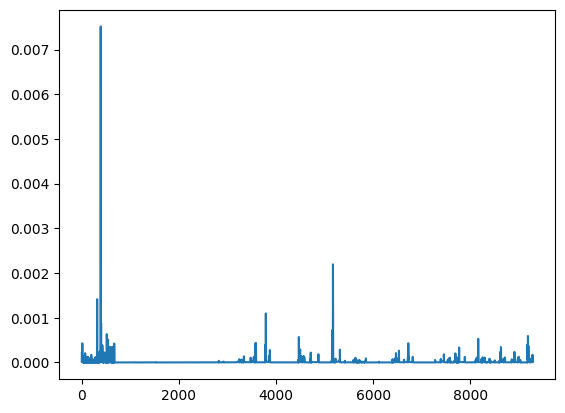

In [9]:
plt.plot(df_metadata_grouped['probability'])

In [10]:
df_metadata_expanded = df_metadata.merge(df_metadata_grouped, on=['source_id', 'rupture_id'], how='left')
df_metadata_expanded = df_metadata_expanded.drop(columns=['probability_x'])
df_metadata_expanded = df_metadata_expanded.rename(columns={'probability_y': 'probability'})

In [ ]:
fn_metadata = "./gm_metadata_expanded.csv"
df_metadata_expanded.to_csv(fn_metadata, index=False)

: 